# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

**Goal:** Prepare, tidy, and clean the data so that it is ready for exploration and analysis.  

**Input:** 1 or more dataframes acquired through the "acquire" step.  

**Output:** 1 dataset split into 3 samples in the form of dataframes: train, validate & test. 

**Artifact:** prepare.py


## How? 

1. Summarize our data: 
    - head(), describe(), info(), isnull(), value_counts(), shape, ...  
    - plt.hist(), plt.boxplot()  
    - document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)  

2. Clean the data:  
    - missing values: drop columns with too many missing values, drop rows with too many missing values, fill with zero where it makes sense, and then make note of any columns you want to impute missing values in (you will need to do that on split data). 
    - outliers: ignore, drop rows, snap to a selected max/min value, create bins (cut, qcut) 
    - data errors: drop the rows/observations with the errors, correct them to what it was intended  
    - address text normalization issues...e.g. deck 'C' 'c'. (correct and standardize the text)
    - tidy data: getting your data in the shape it needs to be for modeling and exploring. every row should be an observation and every column should be a feature/attribute/variable. You want 1 observation per row, and 1 row per observation. If you want to predict a customer churn, each row should be a customer and each customer should be on only 1 row. (address duplicates, aggregate, melt, reshape, ...)   
    - creating new variables out of existing variables (e.g. z = x - y) 
    - rename columns  
    - datatypes: need numeric data to be able to feed into model (dummy vars, factor vars, manual encoding)  
    - scale numeric data: so that continuous variables have the same weight, are on the same units, if algorithm will be used that will be affected by the differing weights, or if data needs to be scaled to a gaussian/normal distribution for statistical testing. (linear scalers and non-linear scalers)  

!!!note *outlier: an observation point that is distant from other observations	https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/*

3. Split the data:
    - split our data into train, validate and test sample dataframes  
    - Why? overfitting: model is not generalizable. It fits the data you've trained it on "too well". 3 points does not necessarily mean a parabola.  
    - **train:** *in-sample*, explore, impute mean, scale numeric data (max() - min()...), fit our ml algorithms, test our models. 
    - **validate, test**: represents future, unseen data  
    - **validate**: confirm our top models have not overfit, test our top n models on unseen data. Using validate performance results, we pick the top **1** model.   
    - **test**: *out-of-sample*, how we expect our top model to perform in production, on unseen data in the future. **ONLY USED ON 1 MODEL.**  
    - You want to do all the prep that can be done on the full dataset before you split. Go through, work on DF for all you need to, then move to train when it's time. So you don't have to go back and forth, because leads to errors and inconsistencies in data. 

!!!note algorithm vs. model   

**algorithm:** the method that sklearn provides, such as decision_tree, knn, ..., y = mx+b    
**model:** that algorithm specific to our data, e.g. regression: the model would contain the slope value and intercept value. y = .2x+5

!!!note Should I do *this* on the full dataset or on the train sample?  
*this*: the action, method, function, step you are about to take on your data.    

1. Are you comparing, looking at the relationship or summary stats or visualizations with 2+ variables?   
2. Are you using an sklearn method?   
3. Are you moving into the explore stage of the pipeline?   

If **ONE** or more of these is yes, then you should be doing it on your train sample.   
If **ALL** are no, then the entire dataset is fine.   

## Summarize Data

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

We'll use the funciton we defined in the last lesson to acquire our data:

In [2]:
df = acquire.get_titanic_data()

In [6]:
# rows & columns
df.shape

(891, 13)

In [7]:
# first n rows
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [9]:
# information about the dataframe: column names, rows, datatypes, non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
sex             891 non-null object
age             714 non-null float64
sibsp           891 non-null int64
parch           891 non-null int64
fare            891 non-null float64
embarked        889 non-null object
class           891 non-null object
deck            203 non-null object
embark_town     889 non-null object
alone           891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [30]:
# describe numeric columns
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


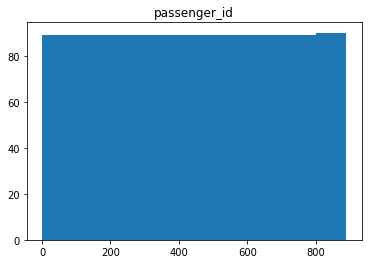

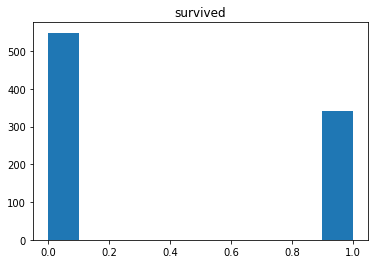

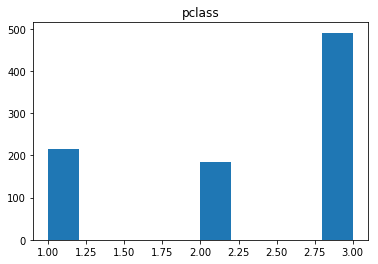

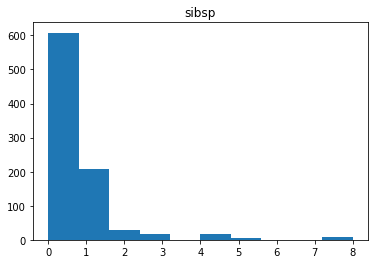

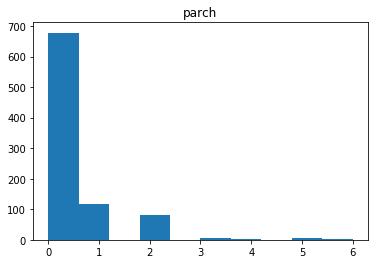

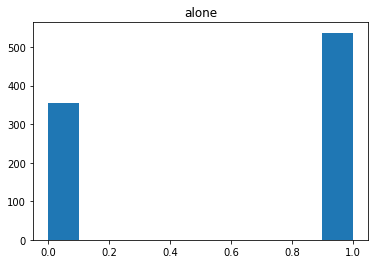

In [33]:
# distribution of numeric columns
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [39]:
# describe object columns
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))

male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


In [40]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of fare by binning
df.fare.value_counts(bins=5, sort=False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [37]:
# columns with missing values
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

**Takeaways**
- embarked == embark_town, so remove embarked & keep embark_town   
- class == pclass, so remove class & keep pclass (already numeric)  
- drop deck...way too many missing values  
- fill embark_town with most common value ('Southampton')  
- drop age column  
- encode or create dummy vars for sex & embark_town. 


## Clean the Data

In [46]:
# drop duplicates...run just in case
df.drop_duplicates(inplace=True)

In [42]:
# drop columns with too many missing to have any value right now
cols_to_drop = ['deck', 'embarked', 'class', 'age']
df = df.drop(columns=cols_to_drop)

We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer *after* the train-validate-test split. 

In [43]:
df['embark_town'] = df.embark_town.fillna(value='Southampton')

Get dummy vars for sex and embark_town

- dummy_na: create a dummy var for na values, also?   
- drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).   

In [44]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# append dummy df cols to the original df. 
df = pd.concat([df, dummy_df], axis=1)

Create a function to perform these steps when we need to reproduce our dataset. 

In [52]:
def clean_data():
    '''
    This function will drop any duplicate observations, 
    drop columns not needed, fill missing embarktown with 'Southampton'
    and create dummy vars of sex and embark_town. 
    '''
    df.drop_duplicates(inplace=True)
    df.drop(columns=['deck', 'embarked', 'class', 'age'], inplace=True)
    df.embark_town.fillna(value='Southampton', inplace=True)
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    return pd.concat([df, dummy_df], axis=1)

## Train, Validate, Test Split

In [47]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=df.survived)

## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. 
We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [49]:
imputer = SimpleImputer(strategy = 'most_frequent')

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [50]:
imputer = imputer.fit(train[['embark_town']])

3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [51]:
train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [53]:
def impute_mode():
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy='most_frequent')
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

Blend the clean, split and impute functions into a single prep_data() function. 

In [54]:
def prep_titanic_data():
    df = clean_data()
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    train, validate, test = impute_mode()
    return train, validate, test

## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  